In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import random
import math
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

from Bio import SeqIO
from collections import Counter

In [2]:
data_dir = '/novo/projects/departments/cdd/molecular_ai/mlbp/data/fibrillation_data'

In [3]:
path = f'{data_dir}/sbxw_fibrillation_peptide_waltzdb.csv'
waltz_df = pd.read_csv(path,index_col=0)
print(waltz_df.shape)
display(waltz_df.groupby('value_bool').size())
display(waltz_df.groupby(['data_split','value_bool']).size())
print(waltz_df.sequence.nunique())
waltz_df = waltz_df.drop(columns='data_split')
waltz_df['group'] = ''
waltz_df.head()

(1399, 3)


value_bool
False    892
True     507
dtype: int64

data_split  value_bool
test        False         177
            True          100
train       False         715
            True          407
dtype: int64

1399


,sequence,value_bool,group
0,STVPIE,False,
1,GVIWIA,True,
2,LATVYA,False,
3,NATAHQ,False,
4,STVGIE,False,


# AA distributions

In [22]:
all_aa = ['R','H','K',
          'D','E',
          'S','T','N','Q',
          'C','G','P',
          'A','V','I','L','M','F','Y','W']

aa_dist = {
    'WaltzDB':Counter(''.join(waltz_df['sequence'])),
    'WaltzDB amyloid':Counter(''.join(waltz_df[waltz_df['value_bool']==True]['sequence'])),
    'WaltzDB non-amyloid':Counter(''.join(waltz_df[waltz_df['value_bool']==False]['sequence'])),
}
aa_df = pd.DataFrame(aa_dist)

aa_df['Non-hydrophobic'] = 0
for aa in 'CDEGHKNPQRST':
    aa_df.loc[aa,'Non-hydrophobic'] = 1
for aa in all_aa:
    aa_df.loc[aa,'Random'] = 1
for col in aa_df.columns:
    aa_df[col]/=aa_df[col].sum()
aa_df = aa_df.reindex(all_aa)
aa_df = aa_df.reset_index(names='aa')
aa_df

,aa,WaltzDB,WaltzDB amyloid,WaltzDB non-amyloid,Non-hydrophobic,Random
0,R,0.013581,0.004931,0.018498,0.083333,0.05
1,H,0.012985,0.014793,0.011958,0.083333,0.05
2,K,0.042411,0.037475,0.045217,0.083333,0.05
3,D,0.019657,0.010191,0.025037,0.083333,0.05
4,E,0.043841,0.033531,0.049701,0.083333,0.05
5,S,0.073386,0.050953,0.086136,0.083333,0.05
6,T,0.072671,0.076266,0.070628,0.083333,0.05
7,N,0.094949,0.049310,0.120889,0.083333,0.05
8,Q,0.077436,0.058514,0.088191,0.083333,0.05
9,C,0.007982,0.014464,0.004297,0.083333,0.05


<Axes: xlabel='aa', ylabel='value'>

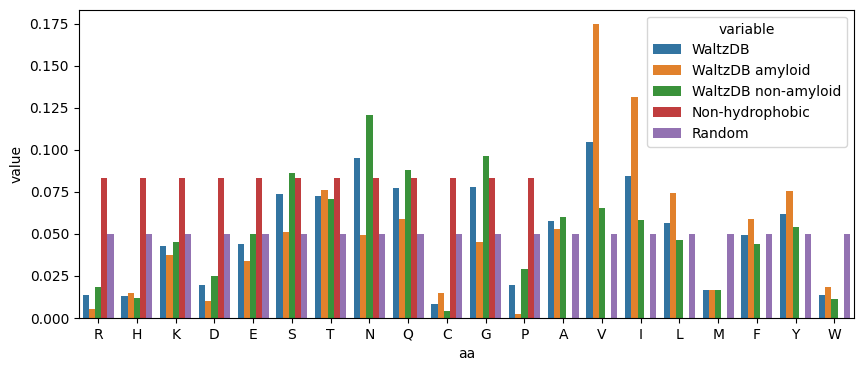

In [23]:
plt.figure(figsize=(10,4))
sns.barplot(data=aa_df.melt(id_vars='aa',value_vars=['WaltzDB','WaltzDB amyloid','WaltzDB non-amyloid','Non-hydrophobic','Random']),
            x='aa',y='value',hue='variable')
# plt.savefig('plots/250407_aadistribution_waltz.png',dpi=300)
# plt.savefig('plots/250407_aadistribution_waltz.pdf',dpi=300)

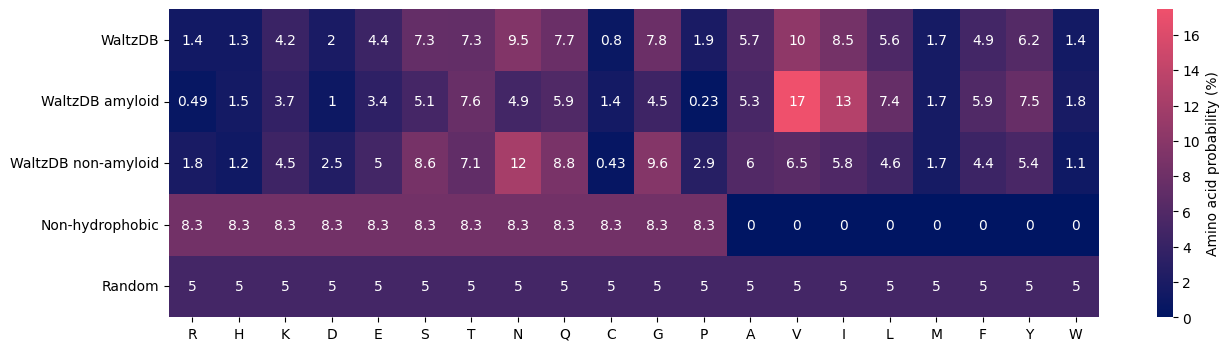

In [24]:
# aa_df_t = aa_df.drop(columns='Random').transpose()
aa_df_t = aa_df.transpose()
aa_df_t = aa_df_t.rename(columns=aa_df_t.loc['aa'])
aa_df_t = aa_df_t.drop(index='aa')

# Define the two hex colors (peachpear)
# "Passionfruit" : ["#C00077", "#EF506C", "#9FB800", "#009A90", "#0054A4", "#001563","#F5FFFF"],
hex_color1 = "#001563"  # Example: a shade of red
hex_color2 = "#EF506C"  # Example: a shade of blue
# Create a custom colormap
cmap = mcolors.LinearSegmentedColormap.from_list("custom_cmap", [hex_color1, hex_color2])

plt.figure(figsize=(15,4))
ax = sns.heatmap(data=aa_df_t.to_numpy(dtype=float)*100,
            xticklabels=aa_df_t.columns,
            yticklabels=aa_df_t.index,
            cbar_kws={'label':'Amino acid probability (%)'},
            annot=True,
            cmap=cmap)
plt.savefig('plots/250531_aadistribution_waltz_heatmap.png',dpi=300)
plt.savefig('plots/250531_aadistribution_waltz_heatmap.pdf',dpi=300)